INCLUDED NER IN TF-IDF

# **INSTALLING DEPENDENCIES**

In [ ]:
!pip install pymupdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 62.7 MB/s eta 0:00:00


In [ ]:
!pip install nltk


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **PREPROCESSING**

In [ ]:

import fitz  # PyMuPDF for PDF extraction
import nltk
from nltk.tokenize import sent_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')


# Step 1: Extract Text from PDF
pdf_path = '/content/NLP_text_doc.pdf'
doc = fitz.open(pdf_path)  # Open PDF file
text = ""
for page in doc:
    text += page.get_text()  # Extract text from each page

# Step 2: Convert Paragraphs to Sentences
# Use NLTK's sent_tokenize to split the text into sentences
sentences = sent_tokenize(text)

# Print the tokenized sentences one by one
for sentence in sentences:
    print(sentence,"\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco. 

The NBA Championship finals between the Los 
Angeles Lakers and the Boston Celtics are set to feature a historic rivalry on June 15, 2025. 

The United States government, under President Joe Biden's administration, has announced a 
new $500 billion economic stimulus package to boost small businesses. 

Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week. 

Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retail industry. 

Cybersecurity threats are on the rise, with the FBI and Interpol warning businesses to 
implement stricter online safety measures after the recent ransomware attack on JPMorgan 
Chase. 

The French national football team secured a dramatic 3-2 victory over Brazil in the 
FIFA World Cup qualifiers

# **NER**

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

# Download necessary NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

RULE BASED AND REGEX NER

In [ ]:
import re

# Step 1: Load entity dictionary from an external text file
def load_entities(file_path):
    entity_dict = {"organizations": [], "locations": [], "persons": []}
    current_category = None

    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            line = line.strip()
            if line in entity_dict:
                current_category = line  # Set current category
            elif current_category and line:
                entity_dict[current_category].append(line.lower())  # Store in lowercase

    return entity_dict

# Step 2: Rule-Based NER using Dictionary Matching
def rule_based_ner(sentence, entity_dict):
    extracted_entities = {key: [] for key in entity_dict.keys()}
    sentence_lower = sentence.lower()  # Convert sentence to lowercase

    for category, words in entity_dict.items():
        for word in words:
            if word in sentence_lower:  # Case-insensitive matching
                extracted_entities[category].append(word.title())  # Title case

    return extracted_entities

# Load entity dictionary
entity_file_path = "/content/ner_corpus.txt"  # Replace with actual path
entity_dict = load_entities(entity_file_path)

# Assuming `sentences` is preprocessed
for i, sentence in enumerate(sentences, start=1):
    rule_based_entities = rule_based_ner(sentence, entity_dict)

    print(f"Sentence {i}: {sentence}\n")

    for category, entities in rule_based_entities.items():
        for entity in entities:
            print(f"Entity: {entity} | Type: {category.capitalize()} (Rule-Based)")

    print("\n" + "-" * 50 + "\n")


Sentence 1: Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco.


--------------------------------------------------

Sentence 2: The NBA Championship finals between the Los 
Angeles Lakers and the Boston Celtics are set to feature a historic rivalry on June 15, 2025.


--------------------------------------------------

Sentence 3: The United States government, under President Joe Biden's administration, has announced a 
new $500 billion economic stimulus package to boost small businesses.


--------------------------------------------------

Sentence 4: Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week.


--------------------------------------------------

Sentence 5: Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retail industry.


-----------------------------

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, RegexpParser

# Download necessary resources
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

NER USING POS TAGGING

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')
# Define a chunk grammar for Named Entity Recognition
grammar = r"""
    NP: {<NNP>+}                # Chunk sequences of proper nouns
"""

# Process each sentence from the preprocessed text
for sentence in sentences:
    words = word_tokenize(sentence)  # Tokenize words
    tagged_words = pos_tag(words)   # POS tagging

    # Apply chunking
    chunk_parser = nltk.RegexpParser(grammar)
    chunk_tree = chunk_parser.parse(tagged_words)

    # Extract named entities
    named_entities = []
    for subtree in chunk_tree.subtrees():
        if subtree.label() == 'NP':  # Only extract named entities
            entity = " ".join(word for word, tag in subtree.leaves())
            named_entities.append(entity)

    print(f"Sentence: {sentence}")
    print(f"Named Entities: {named_entities}\n")

Sentence: Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco.
Named Entities: ['Google', 'Search', 'Google I/O', 'San Francisco']

Sentence: The NBA Championship finals between the Los 
Angeles Lakers and the Boston Celtics are set to feature a historic rivalry on June 15, 2025.
Named Entities: ['NBA Championship', 'Los Angeles Lakers', 'Boston', 'June']

Sentence: The United States government, under President Joe Biden's administration, has announced a 
new $500 billion economic stimulus package to boost small businesses.
Named Entities: ['United', 'President Joe Biden']

Sentence: Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week.
Named Entities: ['Christopher Nolan']

Sentence: Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retail industry.
Named Entities: ['Am

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


NER USING POS TAGGING WITH BETTER CHUNK

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, RegexpParser

# Download necessary resources
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Define an improved chunk grammar for Named Entity Recognition
grammar = r"""
    ENTITY: {<JJ>*<NNP>+<CC>*<NNP>*}  # Capture adjectives + proper nouns + conjunctions
"""

# List of words to exclude (common false positives)
EXCLUDE_WORDS = {"Pro", "Tour", "Best", "Picture", "Exchange", "Commission"}

# Process each sentence from the preprocessed text
for sentence in sentences:
    words = word_tokenize(sentence)  # Tokenize words
    tagged_words = pos_tag(words)    # POS tagging

    # Apply chunking
    chunk_parser = nltk.RegexpParser(grammar)
    chunk_tree = chunk_parser.parse(tagged_words)

    # Extract named entities
    named_entities = []
    for subtree in chunk_tree.subtrees():
        if subtree.label() == 'ENTITY':  # Only extract named entities
            entity = " ".join(word for word, tag in subtree.leaves())
            if entity not in EXCLUDE_WORDS and len(entity) > 1:
                named_entities.append(entity)

    print(f"Sentence: {sentence}")
    print(f"Named Entities: {named_entities}\n")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Sentence: Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco.
Named Entities: ['Google', 'Search', 'annual Google I/O', 'San Francisco']

Sentence: The NBA Championship finals between the Los 
Angeles Lakers and the Boston Celtics are set to feature a historic rivalry on June 15, 2025.
Named Entities: ['NBA Championship', 'Los Angeles Lakers and', 'Boston', 'June']

Sentence: The United States government, under President Joe Biden's administration, has announced a 
new $500 billion economic stimulus package to boost small businesses.
Named Entities: ['United', 'President Joe Biden']

Sentence: Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week.
Named Entities: ['Christopher Nolan']

Sentence: Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retail industry.
Named Ent

FINDING SCORES FOR THE OUTPUT OF NER

In [ ]:
gold_standard = {
    "Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual Google I/O conference in San Francisco.":
    {"Google", "Gemini Search", "Google I/O", "San Francisco"},

    "The NBA Championship finals between the Los Angeles Lakers and the Boston Celtics are set to feature a historic rivalry on June 15, 2025.":
    {"NBA Championship", "Los Angeles Lakers", "Boston Celtics", "June 15, 2025"},

    "The United States government, under President Joe Biden's administration, has announced a new $500 billion economic stimulus package to boost small businesses.":
    {"United States", "Joe Biden"},

    "Christopher Nolan's latest film 'Eclipse' has shattered previous box office records, grossing $200 million worldwide in its first week.":
    {"Christopher Nolan", "Eclipse"},

    "Amazon and Walmart have pledged to focus more on sustainable and ethical products, leading a new wave in the retail industry.":
    {"Amazon", "Walmart"},

    "Cybersecurity threats are on the rise, with the FBI and Interpol warning businesses to implement stricter online safety measures after the recent ransomware attack on JPMorgan Chase.":
    {"FBI", "Interpol", "JPMorgan Chase"},

    "The French national football team secured a dramatic 3-2 victory over Brazil in the FIFA World Cup qualifiers held at Stade de France.":
    {"France", "Brazil", "FIFA World Cup", "Stade de France"},

    "Bitcoin and Ethereum prices have fluctuated significantly due to new regulatory changes introduced by the Securities and Exchange Commission (SEC).":
    {"Bitcoin", "Ethereum", "Securities and Exchange Commission", "SEC"},

    "Taylor Swift has announced a surprise world tour, 'Eras Tour 2025,' with concerts scheduled in London, Tokyo, and Sydney.":
    {"Taylor Swift", "Eras Tour 2025", "London", "Tokyo", "Sydney"},

    "The upcoming Indian general elections in 2025 have seen a record 12% rise in voter registrations, according to the Election Commission of India.":
    {"Indian general elections", "2025", "Election Commission of India"},

    "Apple's latest iPhone 16 Pro features an innovative foldable screen technology and was unveiled at the Apple Event in Cupertino.":
    {"Apple", "iPhone 16 Pro", "Apple Event", "Cupertino"},

    "19-year-old tennis prodigy Emma Raducanu has won her first Grand Slam title at the US Open, defeating Iga Świątek in the final.":
    {"Emma Raducanu", "Grand Slam", "US Open", "Iga Świątek"},

    "Tesla has announced plans to expand into the Indian market, with its first Gigafactory set to be established in Hyderabad.":
    {"Tesla", "Indian market", "Gigafactory", "Hyderabad"},

    "The 97th Academy Awards saw Christopher Nolan and Margot Robbie winning big, with 'Eclipse' taking home the Best Picture award.":
    {"Academy Awards", "Christopher Nolan", "Margot Robbie", "Eclipse", "Best Picture"},

    "A recent bill on data privacy, known as the 'Digital Privacy Protection Act,' has sparked intense debate among lawmakers in the European Parliament.":
    {"Digital Privacy Protection Act", "European Parliament"},

    "Scientists at MIT have developed a breakthrough quantum computing chip, which is expected to revolutionize cryptographic security.":
    {"MIT"},

    "The latest employment report from the U.S. Bureau of Labor Statistics shows a 4% increase in job creation across technology and healthcare industries.":
    {"U.S. Bureau of Labor Statistics"},

    "Netflix's new original series 'The Shadow Chronicles' has gained massive popularity, becoming the most-streamed show in the platform’s history.":
    {"Netflix", "The Shadow Chronicles"},

    "The Republican Party has criticized President Joe Biden's administration for its handling of the ongoing healthcare crisis in the United States.":
    {"Republican Party", "Joe Biden", "United States"},

    "NASA and ESA are planning a joint mission to explore Mars, with the Artemis II project set to launch in 2028.":
    {"NASA", "ESA", "Mars", "Artemis II", "2028"},

    "The International Olympic Committee is considering the inclusion of esports and breakdancing in the 2028 Summer Olympics in Los Angeles.":
    {"International Olympic Committee", "2028 Summer Olympics", "Los Angeles"},

    "Hollywood legend Robert De Niro is set to make a return in an upcoming film sequel to the iconic 'Goodfellas.'":
    {"Robert De Niro", "Goodfellas"},

    "The New York Stock Exchange (NYSE) experienced a 3% surge following a positive economic forecast from the Federal Reserve.":
    {"New York Stock Exchange", "NYSE", "Federal Reserve"},

    "Diplomatic talks between China and the United States have stalled as tensions rise over trade agreements and semiconductor restrictions.":
    {"China", "United States"},

    "Amazon Prime's latest streaming series 'Legacy' has gained massive popularity, topping the charts in 10 countries within its first week of release.":
    {"Amazon Prime", "Legacy"}
}


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Initialize counters
true_positives = 0
false_positives = 0
false_negatives = 0

# Evaluate NER results
for sentence, true_entities in gold_standard.items():
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)

    # Apply chunking
    chunk_parser = nltk.RegexpParser(grammar)
    chunk_tree = chunk_parser.parse(tagged_words)

    # Extract named entities
    predicted_entities = set()
    for subtree in chunk_tree.subtrees():
        if subtree.label() == 'ENTITY':
            entity = " ".join(word for word, tag in subtree.leaves())
            if entity not in EXCLUDE_WORDS and len(entity) > 1:
                predicted_entities.add(entity)

    # Calculate performance metrics
    true_positives += len(predicted_entities & true_entities)
    false_positives += len(predicted_entities - true_entities)
    false_negatives += len(true_entities - predicted_entities)

# Compute Precision, Recall, and F1-score
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Precision: 0.53
Recall: 0.46
F1-score: 0.49


# **NER NO BETTER RESULT**

BETTER CHUNKING FOR IMPROVING ACCURACY (produced no better results, so ignoring this change)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, RegexpParser

# Download necessary resources
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Improved chunking grammar for Named Entity Recognition
grammar = r"""
    ENTITY: {<DT>?<JJ>*<NNP>+<CC>*<NNP>*}  # Adjective(s) + Proper Noun(s) + Conjunctions
    DATE:   {<CD>*<NNP>+<CD>*}            # Capture dates like "June 15, 2025" or "97th Academy Awards"
"""

# Words to exclude (common false positives)
EXCLUDE_WORDS = {"Pro", "Tour", "Best", "Picture", "Exchange", "Commission"}

# Process each sentence from the preprocessed text
for sentence in sentences:
    words = word_tokenize(sentence)  # Tokenize words
    tagged_words = pos_tag(words)    # POS tagging

    # Apply chunking
    chunk_parser = nltk.RegexpParser(grammar)
    chunk_tree = chunk_parser.parse(tagged_words)

    # Extract named entities
    named_entities = []
    for subtree in chunk_tree.subtrees():
        if subtree.label() in {'ENTITY', 'DATE'}:  # Extract named entities and dates
            entity = " ".join(word for word, tag in subtree.leaves())
            if entity not in EXCLUDE_WORDS and len(entity) > 1:
                named_entities.append(entity)

    print(f"Sentence: {sentence}")
    print(f"Named Entities: {named_entities}\n")


Sentence: Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco.
Named Entities: ['Google', 'Search', 'the annual Google I/O', 'San Francisco']

Sentence: The NBA Championship finals between the Los 
Angeles Lakers and the Boston Celtics are set to feature a historic rivalry on June 15, 2025.
Named Entities: ['The NBA Championship', 'the Los Angeles Lakers and', 'the Boston', 'June']

Sentence: The United States government, under President Joe Biden's administration, has announced a 
new $500 billion economic stimulus package to boost small businesses.
Named Entities: ['The United', 'President Joe Biden']

Sentence: Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week.
Named Entities: ['Christopher Nolan']

Sentence: Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retail

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Initialize counters
true_positives = 0
false_positives = 0
false_negatives = 0

# Evaluate NER results
for sentence, true_entities in gold_standard.items():
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)

    # Apply chunking
    chunk_parser = nltk.RegexpParser(grammar)
    chunk_tree = chunk_parser.parse(tagged_words)

    # Extract named entities
    predicted_entities = set()
    for subtree in chunk_tree.subtrees():
        if subtree.label() == 'ENTITY':
            entity = " ".join(word for word, tag in subtree.leaves())
            if entity not in EXCLUDE_WORDS and len(entity) > 1:
                predicted_entities.add(entity)

    # Calculate performance metrics
    true_positives += len(predicted_entities & true_entities)
    false_positives += len(predicted_entities - true_entities)
    false_negatives += len(true_entities - predicted_entities)

# Compute Precision, Recall, and F1-score
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Precision: 0.36
Recall: 0.32
F1-score: 0.34


# **FEATURE EXTRACTION**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Collect named entities from all sentences
all_named_entities = []
for sentence in sentences:
    words = word_tokenize(sentence)  # Tokenize words
    tagged_words = pos_tag(words)    # POS tagging

    # Apply chunking
    chunk_parser = nltk.RegexpParser(grammar)
    chunk_tree = chunk_parser.parse(tagged_words)

    # Extract named entities
    named_entities = []
    for subtree in chunk_tree.subtrees():
        if subtree.label() == 'ENTITY':  # Only extract named entities
            entity = " ".join(word for word, tag in subtree.leaves())
            if entity not in EXCLUDE_WORDS and len(entity) > 1:
                named_entities.append(entity)

    all_named_entities.append(" ".join(named_entities))  # Join entities as a single string per sentence

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform extracted named entities into TF-IDF representation
tfidf_matrix = tfidf_vectorizer.fit_transform(all_named_entities)

# Print feature names and vectorized representation
print("Feature Names:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Representation:\n", tfidf_matrix.toarray())


Feature Names: ['academy' 'act' 'amazon' 'and' 'angeles' 'annual' 'apple' 'artemis'
 'awards' 'best' 'biden' 'bitcoin' 'boston' 'brazil' 'bureau'
 'championship' 'chase' 'china' 'christopher' 'chronicles' 'commission'
 'committee' 'cup' 'cupertino' 'de' 'digital' 'eclipse' 'election' 'emma'
 'esa' 'ethereum' 'european' 'event' 'exchange' 'fbi' 'federal' 'fifa'
 'first' 'france' 'francisco' 'gigafactory' 'google' 'grand' 'hollywood'
 'hyderabad' 'iga' 'ii' 'india' 'international' 'interpol' 'joe'
 'jpmorgan' 'june' 'labor' 'lakers' 'legacy' 'london' 'los' 'margot'
 'mars' 'mit' 'nasa' 'nba' 'netflix' 'new' 'niro' 'nolan' 'nyse' 'olympic'
 'olympics' 'open' 'parliament' 'party' 'picture' 'president' 'prime'
 'privacy' 'protection' 'raducanu' 'republican' 'reserve' 'robbie'
 'robert' 'san' 'search' 'sec' 'shadow' 'slam' 'stade' 'stock' 'summer'
 'swift' 'sydney' 'taylor' 'tesla' 'the' 'tokyo' 'united' 'us' 'walmart'
 'world' 'york']
TF-IDF Representation:
 [[0.         0.         0.      

In [ ]:
import numpy as np

# Get feature names (words in TF-IDF)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Find indices of "Google" and "Amazon" in the feature names
google_idx = np.where(feature_names == "google")[0]
amazon_idx = np.where(feature_names == "amazon")[0]

# Extract embeddings if they exist
if google_idx.size > 0:
    google_embedding = tfidf_matrix[:, google_idx[0]].toarray()
    print("Google Embedding:\n", google_embedding)
else:
    print("Google not found in TF-IDF features.")

if amazon_idx.size > 0:
    amazon_embedding = tfidf_matrix[:, amazon_idx[0]].toarray()
    print("Amazon Embedding:\n", amazon_embedding)
else:
    print("Amazon not found in TF-IDF features.")


Google Embedding:
 [[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Amazon Embedding:
 [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.60317316]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.53102399]]


In [ ]:
import numpy as np

# Get feature names (words in TF-IDF)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Find indices of "Brazil" and "France" in the feature names
brazil_idx = np.where(feature_names == "party")[0]
france_idx = np.where(feature_names == "parliament")[0]

# Extract embeddings if they exist
if brazil_idx.size > 0:
    brazil_embedding = tfidf_matrix[:, brazil_idx[0]].toarray()
    print("Brazil Embedding:\n", brazil_embedding)
else:
    print("Brazil not found in TF-IDF features.")

if france_idx.size > 0:
    france_embedding = tfidf_matrix[:, france_idx[0]].toarray()
    print("France Embedding:\n", france_embedding)
else:
    print("France not found in TF-IDF features.")


Brazil Embedding:
 [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.44697563]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
France Embedding:
 [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.40824829]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [ ]:
print("TF-IDF Representation:\n", tfidf_matrix.toarray())

TF-IDF Representation:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.38389306]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.53102399 ... 0.         0.         0.        ]]


In [ ]:
import numpy as np

# Set print options to display the full matrix
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

# Print the full TF-IDF matrix
print(tfidf_matrix.toarray())  # Convert sparse matrix to a dense array before printing


[[0.         0.         0.         0.         0.         0.35355339 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.35355339 0.         0.70710678 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.35355339 0.35355339 0.         0.         0.         0.         0.         0.      

In [ ]:
import numpy as np
import pandas as pd

# Ensure full matrix is displayed
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

# Convert TF-IDF sparse matrix to dense format
tfidf_dense = tfidf_matrix.toarray()

# Create a DataFrame for better readability
df = pd.DataFrame(tfidf_dense, columns=tfidf_vectorizer.get_feature_names_out())

# Print feature names (words)
print("Feature Names (Columns):")
print(tfidf_vectorizer.get_feature_names_out())

# Print the full TF-IDF matrix with words as column headers
print("\nTF-IDF Matrix:")
print(df)


Feature Names (Columns):
['academy' 'act' 'amazon' 'and' 'angeles' 'annual' 'apple' 'artemis' 'awards' 'best' 'biden' 'bitcoin' 'boston' 'brazil' 'bureau' 'championship' 'chase' 'china' 'christopher' 'chronicles' 'commission' 'committee' 'cup' 'cupertino' 'de' 'digital' 'eclipse' 'election' 'emma' 'esa' 'ethereum' 'european' 'event' 'exchange' 'fbi' 'federal' 'fifa' 'first' 'france' 'francisco' 'gigafactory' 'google' 'grand' 'hollywood' 'hyderabad' 'iga' 'ii' 'india' 'international' 'interpol' 'joe' 'jpmorgan' 'june' 'labor' 'lakers' 'legacy' 'london' 'los' 'margot' 'mars' 'mit' 'nasa' 'nba' 'netflix' 'new' 'niro' 'nolan' 'nyse' 'olympic' 'olympics' 'open' 'parliament' 'party' 'picture' 'president' 'prime' 'privacy' 'protection' 'raducanu' 'republican' 'reserve' 'robbie' 'robert' 'san' 'search' 'sec' 'shadow' 'slam' 'stade' 'stock' 'summer' 'swift' 'sydney' 'taylor' 'tesla' 'the' 'tokyo' 'united' 'us' 'walmart' 'world' 'york']

TF-IDF Matrix:
     academy       act    amazon       and 

# **CLUSTERING SENTENCES**

K-MEANS CLUSTERING BASED ON TF-IDF

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Define the number of clusters (adjust as needed)
num_clusters = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(tfidf_matrix)

# Assign clusters to sentences
clusters = kmeans.labels_

# Print clustered sentences
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id}:")
    for i, sentence in enumerate(sentences):
        if clusters[i] == cluster_id:
            print(f" - {sentence}")



Cluster 0:
 - Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week.
 - The 97th Academy Awards saw Christopher Nolan and Margot Robbie winning big, with 
'Eclipse' taking home the Best Picture award.

Cluster 1:
 - The NBA Championship finals between the Los 
Angeles Lakers and the Boston Celtics are set to feature a historic rivalry on June 15, 2025.
 - Cybersecurity threats are on the rise, with the FBI and Interpol warning businesses to 
implement stricter online safety measures after the recent ransomware attack on JPMorgan 
Chase.
 - The French national football team secured a dramatic 3-2 victory over Brazil in the 
FIFA World Cup qualifiers held at Stade de France.
 - Bitcoin and Ethereum prices have 
fluctuated significantly due to new regulatory changes introduced by the Securities and 
Exchange Commission (SEC).
 - Taylor Swift has announced a surprise world tour, 'Eras Tour 
2025,' with conc

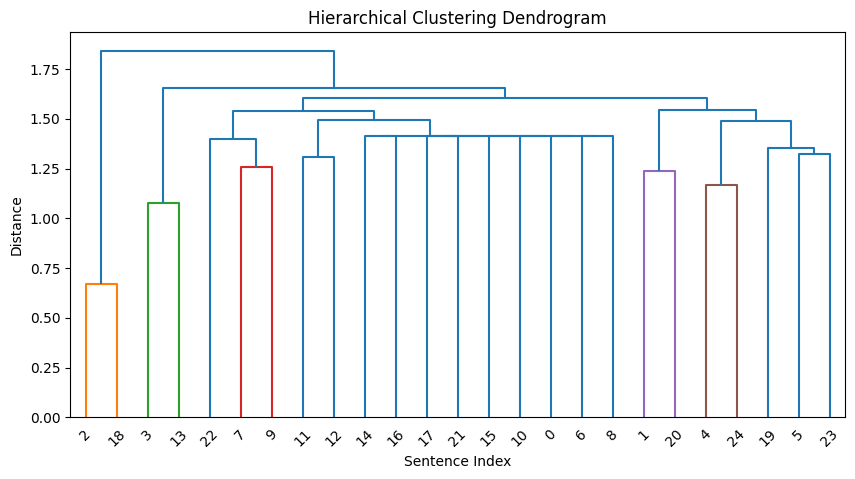


Cluster 0:
 - Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco.
 - The French national football team secured a dramatic 3-2 victory over Brazil in the 
FIFA World Cup qualifiers held at Stade de France.
 - Bitcoin and Ethereum prices have 
fluctuated significantly due to new regulatory changes introduced by the Securities and 
Exchange Commission (SEC).
 - Taylor Swift has announced a surprise world tour, 'Eras Tour 
2025,' with concerts scheduled in London, Tokyo, and Sydney.
 - The upcoming Indian general elections in 2025 have seen a record 12% rise in voter 
registrations, according to the Election Commission of India.
 - Apple's latest iPhone 16 Pro 
features an innovative foldable screen technology and was unveiled at the Apple Event in 
Cupertino.
 - 19-year-old tennis prodigy Emma Raducanu has won her first Grand Slam title at 
the US Open, defeating Iga Świątek in the final.
 - Tesla has announced p

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Plot dendrogram for hierarchical clustering
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(tfidf_matrix.toarray(), method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sentence Index")
plt.ylabel("Distance")
plt.show()

# Perform Agglomerative Clustering
num_clusters = 5
hierarchical = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters_hc = hierarchical.fit_predict(tfidf_matrix.toarray())

# Print clustered sentences
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id}:")
    for i, sentence in enumerate(sentences):
        if clusters_hc[i] == cluster_id:
            print(f" - {sentence}")


K MEANS CLUSTERING WITH EUCLIDEAN DISTANCE

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np

# Set number of clusters (experiment with this value)
num_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(tfidf_matrix)

# Compute distances of each sentence from its assigned cluster centroid
distances = pairwise_distances(tfidf_matrix, kmeans.cluster_centers_, metric='euclidean')

# Print clustering results with distances
print("\n--- K-Means Clustering Results ---")
for i, sentence in enumerate(sentences[:]):  # Display for first 5 sentences
    print(f"\nSentence: {sentence}")
    print(f"Assigned Cluster: {clusters[i]}")
    print(f"Distance from Cluster Center: {distances[i][clusters[i]]:.4f}")

# Print Cluster Centers
print("\nCluster Centers (First 5 Features of Each Center):")
print(kmeans.cluster_centers_[:, :5])



--- K-Means Clustering Results ---

Sentence: Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco.
Assigned Cluster: 3
Distance from Cluster Center: 0.0000

Sentence: The NBA Championship finals between the Los 
Angeles Lakers and the Boston Celtics are set to feature a historic rivalry on June 15, 2025.
Assigned Cluster: 1
Distance from Cluster Center: 0.9482

Sentence: The United States government, under President Joe Biden's administration, has announced a 
new $500 billion economic stimulus package to boost small businesses.
Assigned Cluster: 4
Distance from Cluster Center: 0.5006

Sentence: Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week.
Assigned Cluster: 0
Distance from Cluster Center: 0.5389

Sentence: Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retai

HIERARCHICAL CLUSTERING WITH LINKAGE DISTANCES

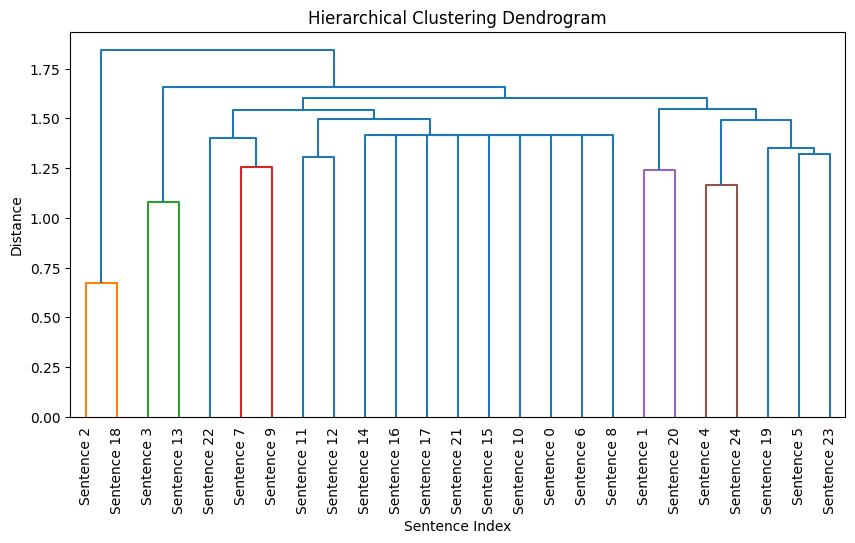


--- Clustered Sentences ---

Cluster 0 (Total sentences: 14)
 - Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco.
 - The French national football team secured a dramatic 3-2 victory over Brazil in the 
FIFA World Cup qualifiers held at Stade de France.
 - Bitcoin and Ethereum prices have 
fluctuated significantly due to new regulatory changes introduced by the Securities and 
Exchange Commission (SEC).
 - Taylor Swift has announced a surprise world tour, 'Eras Tour 
2025,' with concerts scheduled in London, Tokyo, and Sydney.
 - The upcoming Indian general elections in 2025 have seen a record 12% rise in voter 
registrations, according to the Election Commission of India.
 - Apple's latest iPhone 16 Pro 
features an innovative foldable screen technology and was unveiled at the Apple Event in 
Cupertino.
 - 19-year-old tennis prodigy Emma Raducanu has won her first Grand Slam title at 
the US Open, defeating 

In [ ]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

# ===========================
# 1️⃣ Plot Dendrogram for Hierarchical Clustering
# ===========================
plt.figure(figsize=(10, 5))
linkage_matrix = sch.linkage(tfidf_matrix.toarray(), method='ward')  # Compute linkage
sch.dendrogram(linkage_matrix, labels=[f"Sentence {i}" for i in range(len(sentences))], leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sentence Index")
plt.ylabel("Distance")
plt.show()

# ===========================
# 2️⃣ Perform Agglomerative Clustering
# ===========================
num_clusters = 5  # Adjust this if needed
hierarchical = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters_hc = hierarchical.fit_predict(tfidf_matrix.toarray())

# ===========================
# 3️⃣ Print Clustered Sentences
# ===========================
cluster_sentences = {i: [] for i in range(num_clusters)}
for i, cluster_id in enumerate(clusters_hc):
    cluster_sentences[cluster_id].append(i)

print("\n--- Clustered Sentences ---")
for cluster_id, sentence_indices in cluster_sentences.items():
    print(f"\nCluster {cluster_id} (Total sentences: {len(sentence_indices)})")
    for i in sentence_indices:
        print(f" - {sentences[i]}")

# ===========================
# 4️⃣ Compute Intra-Cluster Similarity
# ===========================
print("\n--- Intra-Cluster Similarity ---")
for cluster_id, sentence_indices in cluster_sentences.items():
    if len(sentence_indices) > 1:  # Only compute similarity for clusters with multiple sentences
        print(f"\nCluster {cluster_id} (Total sentences: {len(sentence_indices)})")

        # Extract TF-IDF vectors for sentences in this cluster
        cluster_vectors = tfidf_matrix.toarray()[sentence_indices]
        similarity_matrix = cosine_similarity(cluster_vectors)

        # Store similarities for analysis
        similarities = []
        most_similar_pair = (None, None, 0)  # (Sentence A, Sentence B, Similarity)
        least_similar_pair = (None, None, 1)  # (Sentence A, Sentence B, Similarity)

        for i in range(len(sentence_indices)):
            for j in range(i + 1, len(sentence_indices)):
                similarity = similarity_matrix[i, j]
                similarities.append(similarity)

                # Track most and least similar pairs
                if similarity > most_similar_pair[2]:
                    most_similar_pair = (sentence_indices[i], sentence_indices[j], similarity)
                if similarity < least_similar_pair[2]:
                    least_similar_pair = (sentence_indices[i], sentence_indices[j], similarity)

        # Compute & print average similarity for the cluster
        avg_similarity = np.mean(similarities)
        print(f"📌 Average Similarity for Cluster {cluster_id}: {avg_similarity:.4f}")
        print(f"   🔹 Most Similar Pair: Sentence {most_similar_pair[0]} ↔ Sentence {most_similar_pair[1]} | Similarity: {most_similar_pair[2]:.4f}")
        print(f"   🔻 Least Similar Pair: Sentence {least_similar_pair[0]} ↔ Sentence {least_similar_pair[1]} | Similarity: {least_similar_pair[2]:.4f}")

    else:
        print(f"\nCluster {cluster_id} has only one sentence, skipping similarity calculation.")


# **SUMMARY GENERATION FOR TF-IDF WITH NER**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# ===========================
# 1️⃣ Select Representative Sentences Per Cluster
# ===========================

summary_sentences = []  # Store selected sentences

for cluster_id, sentence_indices in cluster_sentences.items():
    if len(sentence_indices) == 1:
        # If only one sentence in the cluster, take it directly
        summary_sentences.append(sentences[sentence_indices[0]])
    else:
        # Compute average vector for the cluster
        cluster_vectors = tfidf_matrix.toarray()[sentence_indices]
        cluster_avg_vector = np.mean(cluster_vectors, axis=0).reshape(1, -1)

        # Compute similarity of each sentence to the cluster's average
        similarities = cosine_similarity(cluster_vectors, cluster_avg_vector).flatten()

        # Select the most representative sentence (highest similarity to cluster average)
        best_sentence_idx = sentence_indices[np.argmax(similarities)]
        summary_sentences.append(sentences[best_sentence_idx])

# ===========================
# 2️⃣ Print the Final Summary
# ===========================

print("\n--- Generated Summary ---")
summary = " ".join(summary_sentences)  # Combine selected sentences
print(summary)



--- Generated Summary ---
Bitcoin and Ethereum prices have 
fluctuated significantly due to new regulatory changes introduced by the Securities and 
Exchange Commission (SEC). Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retail industry. Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week. The United States government, under President Joe Biden's administration, has announced a 
new $500 billion economic stimulus package to boost small businesses. The International Olympic Committee is 
considering the inclusion of esports and breakdancing in the 2028 Summer Olympics in Los 
Angeles.


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

print("\n--- Cluster Summaries ---")
for cluster_id, sentence_indices in cluster_sentences.items():
    if len(sentence_indices) > 1:
        print(f"\n Summary for Cluster {cluster_id} (Total sentences: {len(sentence_indices)})")

        # Extract TF-IDF vectors for sentences in this cluster
        cluster_vectors = tfidf_matrix.toarray()[sentence_indices]
        similarity_matrix = cosine_similarity(cluster_vectors)

        # Compute average similarity for each sentence
        avg_similarities = np.mean(similarity_matrix, axis=1)

        # Select the best sentence (highest average similarity)
        best_sentence_idx = sentence_indices[np.argmax(avg_similarities)]
        print(f"📝 Summary: {sentences[best_sentence_idx]} (Avg. Similarity: {np.max(avg_similarities):.4f})")

    else:
        print(f"\nCluster {cluster_id} has only one sentence, skipping summarization.")



--- Cluster Summaries ---

 Summary for Cluster 0 (Total sentences: 14)
📝 Summary: Bitcoin and Ethereum prices have 
fluctuated significantly due to new regulatory changes introduced by the Securities and 
Exchange Commission (SEC). (Avg. Similarity: 0.0962)

 Summary for Cluster 1 (Total sentences: 5)
📝 Summary: Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retail industry. (Avg. Similarity: 0.3460)

 Summary for Cluster 2 (Total sentences: 2)
📝 Summary: Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week. (Avg. Similarity: 0.7095)

 Summary for Cluster 3 (Total sentences: 2)
📝 Summary: The United States government, under President Joe Biden's administration, has announced a 
new $500 billion economic stimulus package to boost small businesses. (Avg. Similarity: 0.8874)

 Summary for Cluster 4 (Total sentences: 2)
📝 Summary: The NBA Cham

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

print("\n--- Cluster Summaries ---")
for cluster_id, sentence_indices in cluster_sentences.items():
    if len(sentence_indices) > 1:
        print(f"\n📌 Summary for Cluster {cluster_id} (Total sentences: {len(sentence_indices)})")

        # Extract TF-IDF vectors for sentences in this cluster
        cluster_vectors = tfidf_matrix.toarray()[sentence_indices]
        similarity_matrix = cosine_similarity(cluster_vectors)

        # Compute average similarity for each sentence
        avg_similarities = np.mean(similarity_matrix, axis=1)

        # Select the best sentence (highest average similarity)
        best_sentence_idx = sentence_indices[np.argmax(avg_similarities)]
        best_sentence_sim = np.max(avg_similarities)

        # Print similarity scores for all sentences in the cluster
        print("\n🔹 Average Similarity Scores for Each Sentence:")
        for i, idx in enumerate(sentence_indices):
            marker = "✅" if idx == best_sentence_idx else "  "  # Highlight best sentence
            print(f"   {marker} Sentence {idx}: Avg. Similarity = {avg_similarities[i]:.4f}")

        # Display summary sentence
        print(f"\n📝 Summary: {sentences[best_sentence_idx]} (Avg. Similarity: {best_sentence_sim:.4f})")

    else:
        print(f"\nCluster {cluster_id} has only one sentence, skipping summarization.")



--- Cluster Summaries ---

📌 Summary for Cluster 0 (Total sentences: 14)

🔹 Average Similarity Scores for Each Sentence:
      Sentence 0: Avg. Similarity = 0.0714
      Sentence 6: Avg. Similarity = 0.0714
   ✅ Sentence 7: Avg. Similarity = 0.0962
      Sentence 8: Avg. Similarity = 0.0714
      Sentence 9: Avg. Similarity = 0.0865
      Sentence 10: Avg. Similarity = 0.0714
      Sentence 11: Avg. Similarity = 0.0818
      Sentence 12: Avg. Similarity = 0.0818
      Sentence 14: Avg. Similarity = 0.0714
      Sentence 15: Avg. Similarity = 0.0714
      Sentence 16: Avg. Similarity = 0.0714
      Sentence 17: Avg. Similarity = 0.0714
      Sentence 21: Avg. Similarity = 0.0714
      Sentence 22: Avg. Similarity = 0.0811

📝 Summary: Bitcoin and Ethereum prices have 
fluctuated significantly due to new regulatory changes introduced by the Securities and 
Exchange Commission (SEC). (Avg. Similarity: 0.0962)

📌 Summary for Cluster 1 (Total sentences: 5)

🔹 Average Similarity Scores for E

# **GLOVE EMBEDDINGS ONLY SUMMARY(W/O CLUSTERING)**

In [ ]:
import fitz  # PyMuPDF for PDF extraction
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, RegexpParser, ne_chunk
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader as api
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('maxent_ne_chunker_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Step 1: Extract Text from PDF
pdf_path = '/content/NLP_text_doc.pdf'
doc = fitz.open(pdf_path)
text = "".join(page.get_text() for page in doc)  # Extract and merge text

# Step 2: Convert Paragraphs to Sentences
sentences = sent_tokenize(text)

# Step 3: Named Entity Recognition (NER)
def extract_named_entities(sentence):
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    chunk_tree = ne_chunk(tagged_words)
    named_entities = [" ".join(c[0] for c in subtree) for subtree in chunk_tree if hasattr(subtree, 'label')]
    return named_entities

named_entities_dict = {sent: extract_named_entities(sent) for sent in sentences}

# Print NER results
for sentence, entities in named_entities_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Named Entities: {entities}\n")

# Step 4: Preprocess text for GloVe
cleaned_sentences = [word_tokenize(sent.lower()) for sent in sentences]

# Load pre-trained GloVe embeddings
glove_model = api.load("glove-wiki-gigaword-100")

# Get sentence representations using GloVe (average of word vectors)
glove_vectors = [
    np.mean([glove_model[word] for word in words if word in glove_model], axis=0)
    if any(word in glove_model for word in words) else np.zeros(100)  # Handle empty cases
    for words in cleaned_sentences
]

# Compute Cosine Similarity between sentences
cos_sim_matrix_glove = cosine_similarity(glove_vectors)

# Calculate the importance of each sentence
sentence_scores_glove = cos_sim_matrix_glove.sum(axis=1)

# Get top-ranked sentences for summary
top_n = 5  # Number of sentences to include in summary
top_sentence_indices_glove = np.argsort(sentence_scores_glove)[-top_n:]
top_sentence_indices_sorted_glove = sorted(top_sentence_indices_glove)

# Generate summary
summary_glove = [sentences[i] for i in top_sentence_indices_sorted_glove]

# Print summary
print("\nGenerated Summary (GloVe):")
for sentence in summary_glove:
    print(sentence)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Sentence: Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco.
Named Entities: ['Google', 'Search', 'Google', 'San Francisco']

Sentence: The NBA Championship finals between the Los 
Angeles Lakers and the Boston Celtics are set to feature a historic rivalry on June 15, 2025.
Named Entities: ['NBA', 'Los Angeles', 'Boston Celtics']

Sentence: The United States government, under President Joe Biden's administration, has announced a 
new $500 billion economic stimulus package to boost small businesses.
Named Entities: ['United States', 'Joe Biden']

Sentence: Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week.
Named Entities: ['Christopher', 'Nolan']

Sentence: Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retail industry.
Named Entities: ['Amazon', 'Walmart']

Sente

GLOVE EMBEDDINGS

# **GLOVE NER + EMBEDDINGS**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Sentence: Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco.
Named Entities: ['Google', 'Search', 'Google', 'San Francisco']

Sentence: The NBA Championship finals between the Los 
Angeles Lakers and the Boston Celtics are set to feature a historic rivalry on June 15, 2025.
Named Entities: ['NBA', 'Los Angeles', 'Boston Celtics']

Sentence: The United States government, under President Joe Biden's administration, has announced a 
new $500 billion economic stimulus package to boost small businesses.
Named Entities: ['United States', 'Joe Biden']

Sentence: Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week.
Named Entities: ['Christopher', 'Nolan']

Sentence: Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retail industry.
Named Entities: ['Amazon', 'Walmart']

Sente

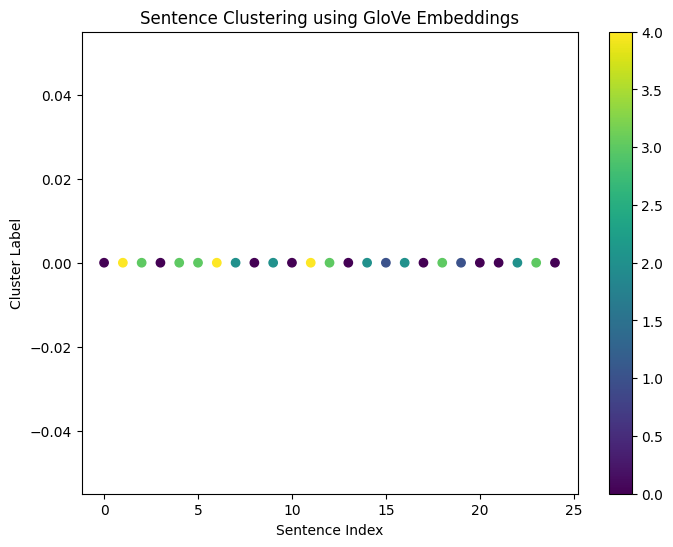


Generated Summary (GloVe):
Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retail industry.
Taylor Swift has announced a surprise world tour, 'Eras Tour 
2025,' with concerts scheduled in London, Tokyo, and Sydney.
Tesla has announced plans to expand into the 
Indian market, with its first Gigafactory set to be established in Hyderabad.
A recent bill on data privacy, known as the 
'Digital Privacy Protection Act,' has sparked intense debate among lawmakers in the European 
Parliament.
Amazon 
Prime's latest streaming series 'Legacy' has gained massive popularity, topping the charts in 
10 countries within its first week of release.

Cluster 0: 
  - Sentence: Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco.
    Embedding: [-0.1341397  -0.07695016  0.1692875  -0.25449884  0.34397864] ... (truncated)
  - Sentence: Christopher Nolan's 
latest film 'E

In [ ]:
import fitz  # PyMuPDF for PDF extraction
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, RegexpParser, ne_chunk
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader as api
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Step 1: Extract Text from PDF
pdf_path = '/content/NLP_text_doc.pdf'
doc = fitz.open(pdf_path)
text = "".join(page.get_text() for page in doc)  # Extract and merge text

# Step 2: Convert Paragraphs to Sentences
sentences = sent_tokenize(text)

# Step 3: Named Entity Recognition (NER)
def extract_named_entities(sentence):
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    chunk_tree = ne_chunk(tagged_words)
    named_entities = [" ".join(c[0] for c in subtree) for subtree in chunk_tree if hasattr(subtree, 'label')]
    return named_entities

named_entities_dict = {sent: extract_named_entities(sent) for sent in sentences}

# Print NER results
for sentence, entities in named_entities_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Named Entities: {entities}\n")

# Step 4: Preprocess text for GloVe
cleaned_sentences = [word_tokenize(sent.lower()) for sent in sentences]

# Load pre-trained GloVe embeddings
glove_model = api.load("glove-wiki-gigaword-100")

# Get sentence representations using GloVe (average of word vectors)
glove_vectors = [
    np.mean([glove_model[word] for word in words if word in glove_model], axis=0)
    if any(word in glove_model for word in words) else np.zeros(100)  # Handle empty cases
    for words in cleaned_sentences
]

# Compute Cosine Similarity between sentences
cos_sim_matrix_glove = cosine_similarity(glove_vectors)

# Perform Clustering using K-Means
num_clusters = 5  # Define number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(glove_vectors)
labels = kmeans.labels_

# Plot Clusters
plt.figure(figsize=(8,6))
plt.scatter(range(len(glove_vectors)), [0] * len(glove_vectors), c=labels, cmap='viridis')
plt.title("Sentence Clustering using GloVe Embeddings")
plt.xlabel("Sentence Index")
plt.ylabel("Cluster Label")
plt.colorbar()
plt.show()

# Calculate the importance of each sentence
sentence_scores_glove = cos_sim_matrix_glove.sum(axis=1)

# Get top-ranked sentences for summary
top_n = 5  # Number of sentences to include in summary
top_sentence_indices_glove = np.argsort(sentence_scores_glove)[-top_n:]
top_sentence_indices_sorted_glove = sorted(top_sentence_indices_glove)

# Generate summary
summary_glove = [sentences[i] for i in top_sentence_indices_sorted_glove]

# Print summary
print("\nGenerated Summary (GloVe):")
for sentence in summary_glove:
    print(sentence)

# Print clusters and compute intra-cluster similarity
for i in range(num_clusters):
    print(f"\nCluster {i}: ")
    cluster_indices = [j for j, label in enumerate(labels) if label == i]
    cluster_sentences = [sentences[j] for j in cluster_indices]
    cluster_vectors = [glove_vectors[j] for j in cluster_indices]

    if len(cluster_vectors) > 1:
        cluster_sim_matrix = cosine_similarity(cluster_vectors)
        avg_intra_cluster_similarity = np.mean(cluster_sim_matrix)
    else:
        avg_intra_cluster_similarity = 1.0  # Only one sentence in the cluster

    for sent, vec in zip(cluster_sentences, cluster_vectors):
        print(f"  - Sentence: {sent}")
        print(f"    Embedding: {vec[:5]} ... (truncated)")
    print(f"  - Average Intra-Cluster Similarity: {avg_intra_cluster_similarity:.4f}\n")


# **glove+tfidf weigthed , +ner**

In [ ]:
import fitz  # PyMuPDF for PDF extraction
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, ne_chunk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

# Step 1: Extract Text from PDF
pdf_path = '/content/NLP_text_doc.pdf'
doc = fitz.open(pdf_path)
text = "".join(page.get_text() for page in doc)  # Extract and merge text

# Step 2: Convert Paragraphs to Sentences
sentences = sent_tokenize(text)

# Step 3: Named Entity Recognition (NER) Feature Extraction
def extract_named_entities(sentence):
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    chunk_tree = ne_chunk(tagged_words)
    named_entities = [" ".join(c[0] for c in subtree) for subtree in chunk_tree if hasattr(subtree, 'label')]
    return named_entities

ner_features = []  # Store NER-based features

# Load pre-trained GloVe embeddings
glove_model = api.load("glove-wiki-gigaword-100")

for sentence in sentences:
    entities = extract_named_entities(sentence)
    entity_vector = np.zeros(100)  # Initialize empty vector
    if entities:
        entity_words = " ".join(entities).split()
        valid_entities = [word for word in entity_words if word in glove_model]
        if valid_entities:
            entity_vector = np.mean([glove_model[word] for word in valid_entities], axis=0)
    ner_features.append(entity_vector)

# Step 4: Compute TF-IDF Weights for Words
vectorizer = TfidfVectorizer(stop_words=stopwords.words("english"))
tfidf_matrix = vectorizer.fit_transform(sentences)
tfidf_vocab = vectorizer.get_feature_names_out()

# Step 5: Compute TF-IDF Weighted Sentence Embeddings
def get_weighted_glove_embedding(sentence):
    words = word_tokenize(sentence.lower())
    valid_words = [word for word in words if word in glove_model and word in tfidf_vocab]

    if not valid_words:
        return np.zeros(100)  # Handle empty case

    word_weights = [tfidf_matrix[sentences.index(sentence), tfidf_vocab.tolist().index(word)]
                    if word in tfidf_vocab else 0 for word in valid_words]

    word_vectors = np.array([glove_model[word] for word in valid_words])
    weighted_embedding = np.average(word_vectors, axis=0, weights=word_weights)

    return weighted_embedding

weighted_glove_vectors = [get_weighted_glove_embedding(sent) for sent in sentences]

# Step 6: Combine TF-IDF Weighted GloVe Embeddings with NER Features
combined_vectors = [glove_vec + ner_vec for glove_vec, ner_vec in zip(weighted_glove_vectors, ner_features)]

# Step 7: Reduce Dimensionality with PCA for Better Processing
combined_vectors = np.array(combined_vectors)  # Convert list to NumPy array
pca = PCA(n_components=min(25, combined_vectors.shape[1]))  # Ensure valid n_components
  # Ensure valid n_components
reduced_vectors = pca.fit_transform(combined_vectors)

# Print Summary
print("\nGenerated Summary:")
top_n = 5  # Number of sentences in summary
sentence_scores = cosine_similarity(reduced_vectors).sum(axis=1)
top_sentence_indices = np.argsort(sentence_scores)[-top_n:]
summary = [sentences[i] for i in sorted(top_sentence_indices)]

for sentence in summary:
    print(sentence)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Generated Summary:
Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week.
Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retail industry.
The upcoming Indian general elections in 2025 have seen a record 12% rise in voter 
registrations, according to the Election Commission of India.
The latest employment report from the 
U.S. Bureau of Labor Statistics shows a 4% increase in job creation across technology and 
healthcare industries.
Amazon 
Prime's latest streaming series 'Legacy' has gained massive popularity, topping the charts in 
10 countries within its first week of release.


# **NER WITH GLOVE**

In [ ]:
import fitz  # PyMuPDF for PDF extraction
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, RegexpParser, ne_chunk
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader as api
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Step 1: Extract Text from PDF
pdf_path = '/content/NLP_text_doc.pdf'
doc = fitz.open(pdf_path)
text = "".join(page.get_text() for page in doc)  # Extract and merge text

# Step 2: Convert Paragraphs to Sentences
sentences = sent_tokenize(text)

# Step 3: Named Entity Recognition (NER) and Feature Extraction
def extract_named_entities(sentence):
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    chunk_tree = ne_chunk(tagged_words)
    named_entities = [" ".join(c[0] for c in subtree) for subtree in chunk_tree if hasattr(subtree, 'label')]
    return named_entities

ner_features = []  # Store NER-based features

for sentence in sentences:
    entities = extract_named_entities(sentence)
    entity_vector = np.zeros(100)  # Initialize empty vector
    if entities:
        entity_words = " ".join(entities).split()
        valid_entities = [word for word in entity_words if word in glove_model]
        if valid_entities:
            entity_vector = np.mean([glove_model[word] for word in valid_entities], axis=0)
    ner_features.append(entity_vector)

# Load pre-trained GloVe embeddings
glove_model = api.load("glove-wiki-gigaword-100")

# Get sentence representations using GloVe (average of word vectors)
glove_vectors = [
    np.mean([glove_model[word] for word in word_tokenize(sent.lower()) if word in glove_model], axis=0)
    if any(word in glove_model for word in word_tokenize(sent.lower())) else np.zeros(100)  # Handle empty cases
    for sent in sentences
]

# Combine GloVe embeddings with NER-based entity embeddings
combined_vectors = [glove_vec + ner_vec for glove_vec, ner_vec in zip(glove_vectors, ner_features)]

# Compute Cosine Similarity between sentences
cos_sim_matrix_glove = cosine_similarity(combined_vectors)

# Perform Clustering using K-Means
num_clusters = 5  # Define number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(combined_vectors)
labels = kmeans.labels_

# Calculate the importance of each sentence
sentence_scores_glove = cos_sim_matrix_glove.sum(axis=1)

# Get top-ranked sentences for summary
top_n = 5  # Number of sentences to include in summary
top_sentence_indices_glove = np.argsort(sentence_scores_glove)[-top_n:]
top_sentence_indices_sorted_glove = sorted(top_sentence_indices_glove)

# Generate summary
summary_glove = [sentences[i] for i in top_sentence_indices_sorted_glove]

# Print summary
print("\nGenerated Summary (GloVe + NER):")
for sentence in summary_glove:
    print(sentence)

# Print clusters and compute intra-cluster similarity
for i in range(num_clusters):
    print(f"\nCluster {i}: ")
    cluster_indices = [j for j, label in enumerate(labels) if label == i]
    cluster_sentences = [sentences[j] for j in cluster_indices]
    cluster_vectors = [combined_vectors[j] for j in cluster_indices]

    if len(cluster_vectors) > 1:
        cluster_sim_matrix = cosine_similarity(cluster_vectors)
        avg_intra_cluster_similarity = np.mean(cluster_sim_matrix)
    else:
        avg_intra_cluster_similarity = 1.0  # Only one sentence in the cluster

    for sent, vec in zip(cluster_sentences, cluster_vectors):
        print(f"  - Sentence: {sent}")
        print(f"    Embedding: {vec[:5]} ... (truncated)")
    print(f"  - Average Intra-Cluster Similarity: {avg_intra_cluster_similarity:.4f}\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!



Generated Summary (GloVe + NER):
Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retail industry.
Taylor Swift has announced a surprise world tour, 'Eras Tour 
2025,' with concerts scheduled in London, Tokyo, and Sydney.
Tesla has announced plans to expand into the 
Indian market, with its first Gigafactory set to be established in Hyderabad.
A recent bill on data privacy, known as the 
'Digital Privacy Protection Act,' has sparked intense debate among lawmakers in the European 
Parliament.
Amazon 
Prime's latest streaming series 'Legacy' has gained massive popularity, topping the charts in 
10 countries within its first week of release.

Cluster 0: 
  - Sentence: Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco.
    Embedding: [-0.1341397  -0.07695016  0.1692875  -0.25449884  0.34397864] ... (truncated)
  - Sentence: Christopher Nolan's 
latest f

# **GLOVE + NER (DIFFERNT CLUSTERING)**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


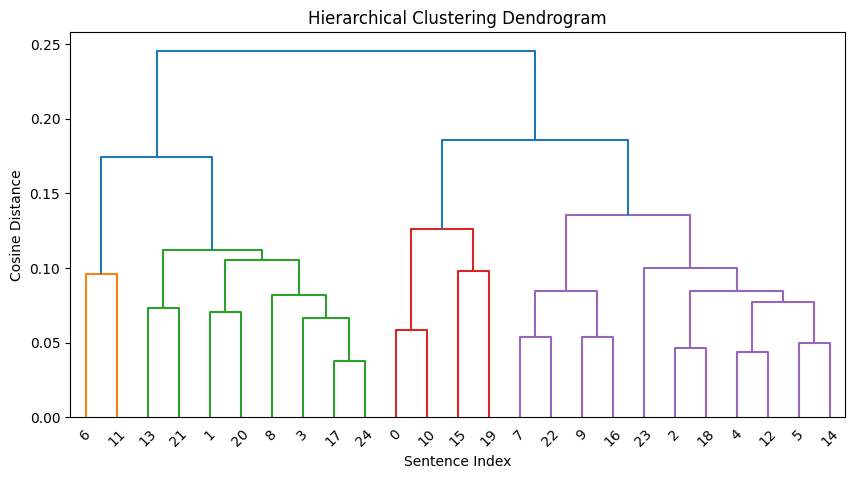


DBSCAN Clustering Results:

Cluster 0: 
  - Sentence: Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco.
    Embedding: [-0.1341397  -0.07695016  0.1692875  -0.25449884  0.34397864] ... (truncated)
  - Sentence: The NBA Championship finals between the Los 
Angeles Lakers and the Boston Celtics are set to feature a historic rivalry on June 15, 2025.
    Embedding: [ 0.15333894 -0.11841092  0.46995437 -0.35908896  0.14125443] ... (truncated)
  - Sentence: The United States government, under President Joe Biden's administration, has announced a 
new $500 billion economic stimulus package to boost small businesses.
    Embedding: [ 0.02005943  0.2570661   0.33343884 -0.20359467  0.25936663] ... (truncated)
  - Sentence: Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week.
    Embedding: [ 0.10896237  0.09360835  0.40677756 -0.226

In [ ]:
import fitz  # PyMuPDF for PDF extraction
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, ne_chunk
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader as api
import numpy as np
from sklearn.cluster import DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Step 1: Extract Text from PDF
pdf_path = '/content/NLP_text_doc.pdf'
doc = fitz.open(pdf_path)
text = "".join(page.get_text() for page in doc)  # Extract and merge text

# Step 2: Convert Paragraphs to Sentences
sentences = sent_tokenize(text)

# Step 3: Named Entity Recognition (NER) and Feature Extraction
def extract_named_entities(sentence):
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    chunk_tree = ne_chunk(tagged_words)
    named_entities = [" ".join(c[0] for c in subtree) for subtree in chunk_tree if hasattr(subtree, 'label')]
    return named_entities

# Load pre-trained GloVe embeddings
glove_model = api.load("glove-wiki-gigaword-100")

# Generate sentence embeddings
glove_vectors = []
ner_features = []

for sentence in sentences:
    words = word_tokenize(sentence.lower())
    glove_vec = np.mean([glove_model[word] for word in words if word in glove_model], axis=0) \
        if any(word in glove_model for word in words) else np.zeros(100)

    # Extract NER-based features
    entities = extract_named_entities(sentence)
    entity_vector = np.zeros(100)
    if entities:
        entity_words = " ".join(entities).split()
        valid_entities = [word for word in entity_words if word in glove_model]
        if valid_entities:
            entity_vector = np.mean([glove_model[word] for word in valid_entities], axis=0)

    glove_vectors.append(glove_vec)
    ner_features.append(entity_vector)

# Combine GloVe embeddings with NER-based entity embeddings
combined_vectors = [glove_vec + ner_vec for glove_vec, ner_vec in zip(glove_vectors, ner_features)]

# Compute Cosine Similarity between sentences
cos_sim_matrix_glove = cosine_similarity(combined_vectors)

# Perform Clustering using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
dbscan_labels = dbscan.fit_predict(combined_vectors)

# Perform Clustering using Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5, linkage='complete')
hierarchical_labels = hierarchical.fit_predict(combined_vectors)

# Plot Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 5))
Z = linkage(combined_vectors, method='complete', metric='cosine')
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sentence Index")
plt.ylabel("Cosine Distance")
plt.show()

# Print clusters and compute intra-cluster similarity
def print_clusters(cluster_labels, method_name):
    unique_labels = set(cluster_labels)
    print(f"\n{method_name} Clustering Results:")
    for label in unique_labels:
        if label == -1:
            print("\nNoise (Unclustered Data):")
            cluster_indices = [j for j, lbl in enumerate(cluster_labels) if lbl == label]
        else:
            print(f"\nCluster {label}: ")
            cluster_indices = [j for j, lbl in enumerate(cluster_labels) if lbl == label]

        cluster_sentences = [sentences[j] for j in cluster_indices]
        cluster_vectors = [combined_vectors[j] for j in cluster_indices]

        if len(cluster_vectors) > 1:
            cluster_sim_matrix = cosine_similarity(cluster_vectors)
            avg_intra_cluster_similarity = np.mean(cluster_sim_matrix)
        else:
            avg_intra_cluster_similarity = 1.0  # Only one sentence in the cluster

        for sent, vec in zip(cluster_sentences, cluster_vectors):
            print(f"  - Sentence: {sent}")
            print(f"    Embedding: {vec[:5]} ... (truncated)")
        print(f"  - Average Intra-Cluster Similarity: {avg_intra_cluster_similarity:.4f}\n")

print_clusters(dbscan_labels, "DBSCAN")
print_clusters(hierarchical_labels, "Hierarchical")


# **FASTTEXT WITH NER**

In [ ]:
import fitz  # PyMuPDF for PDF extraction
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, ne_chunk
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader as api
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Step 1: Extract Text from PDF
pdf_path = '/content/NLP_text_doc.pdf'
doc = fitz.open(pdf_path)
text = "".join(page.get_text() for page in doc)  # Extract and merge text

# Step 2: Convert Paragraphs to Sentences
sentences = sent_tokenize(text)

# Step 3: Named Entity Recognition (NER)
def extract_named_entities(sentence):
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    chunk_tree = ne_chunk(tagged_words)
    named_entities = [" ".join(c[0] for c in subtree) for subtree in chunk_tree if hasattr(subtree, 'label')]
    return named_entities

named_entities_dict = {sent: extract_named_entities(sent) for sent in sentences}

# Print NER results
for sentence, entities in named_entities_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Named Entities: {entities}\n")

# Step 4: Load pre-trained FastText embeddings
fasttext_model = api.load("fasttext-wiki-news-subwords-300")

# Function to get sentence embeddings with NER influence
def get_sentence_embedding(sentence):
    words = word_tokenize(sentence.lower())
    named_entities = named_entities_dict.get(sentence, [])  # Get named entities for the sentence

    # Get embeddings for sentence words
    word_embeddings = [fasttext_model[word] for word in words if word in fasttext_model]

    # Get embeddings for named entities (treat as single tokens)
    entity_embeddings = [fasttext_model[entity] for entity in named_entities if entity in fasttext_model]

    # Compute sentence embedding
    if word_embeddings and entity_embeddings:
        sentence_embedding = np.mean(word_embeddings + entity_embeddings, axis=0)  # Combine both
    elif word_embeddings:
        sentence_embedding = np.mean(word_embeddings, axis=0)
    elif entity_embeddings:
        sentence_embedding = np.mean(entity_embeddings, axis=0)
    else:
        sentence_embedding = np.zeros(300)  # Default zero vector if no valid words/entities

    return sentence_embedding

# Compute sentence embeddings
fasttext_vectors = [get_sentence_embedding(sent) for sent in sentences]

# Compute Cosine Similarity between sentences
cos_sim_matrix_fasttext = cosine_similarity(fasttext_vectors)

# Perform Clustering using K-Means
num_clusters = 5  # Define number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(fasttext_vectors)
labels = kmeans.labels_

# Calculate the importance of each sentence
sentence_scores_fasttext = cos_sim_matrix_fasttext.sum(axis=1)

# Get top-ranked sentences for summary
top_n = 5  # Number of sentences to include in summary
top_sentence_indices_fasttext = np.argsort(sentence_scores_fasttext)[-top_n:]
top_sentence_indices_sorted_fasttext = sorted(top_sentence_indices_fasttext)

# Generate summary
summary_fasttext = [sentences[i] for i in top_sentence_indices_sorted_fasttext]

# Print summary
print("\nGenerated Summary (FastText + NER):")
for sentence in summary_fasttext:
    print(sentence)

# Print clusters and compute intra-cluster similarity
for i in range(num_clusters):
    print(f"\nCluster {i}: ")
    cluster_indices = [j for j, label in enumerate(labels) if label == i]
    cluster_sentences = [sentences[j] for j in cluster_indices]
    cluster_vectors = [fasttext_vectors[j] for j in cluster_indices]

    if len(cluster_vectors) > 1:
        cluster_sim_matrix = cosine_similarity(cluster_vectors)
        avg_intra_cluster_similarity = np.mean(cluster_sim_matrix)
    else:
        avg_intra_cluster_similarity = 1.0  # Only one sentence in the cluster

    for sent, vec in zip(cluster_sentences, cluster_vectors):
        print(f"  - Sentence: {sent}")
        print(f"    Embedding: {vec[:5]} ... (truncated)")
    print(f"  - Average Intra-Cluster Similarity: {avg_intra_cluster_similarity:.4f}\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Sentence: Google has unveiled a new AI-powered search engine named 'Gemini Search' at the annual 
Google I/O conference in San Francisco.
Named Entities: ['Google', 'Search', 'Google', 'San Francisco']

Sentence: The NBA Championship finals between the Los 
Angeles Lakers and the Boston Celtics are set to feature a historic rivalry on June 15, 2025.
Named Entities: ['NBA', 'Los Angeles', 'Boston Celtics']

Sentence: The United States government, under President Joe Biden's administration, has announced a 
new $500 billion economic stimulus package to boost small businesses.
Named Entities: ['United States', 'Joe Biden']

Sentence: Christopher Nolan's 
latest film 'Eclipse' has shattered previous box office records, grossing $200 million 
worldwide in its first week.
Named Entities: ['Christopher', 'Nolan']

Sentence: Amazon and Walmart have pledged to focus more on sustainable 
and ethical products, leading a new wave in the retail industry.
Named Entities: ['Amazon', 'Walmart']

Sente